In [113]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
tags = pd.read_csv('tags.csv')
tag_counts = pd.read_csv('book_tags.csv')
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
to_read = pd.read_csv('to_read.csv')

In [11]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [12]:
tag_counts.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [14]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [15]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [21]:
year_groups = books.groupby('original_publication_year')
year_groups

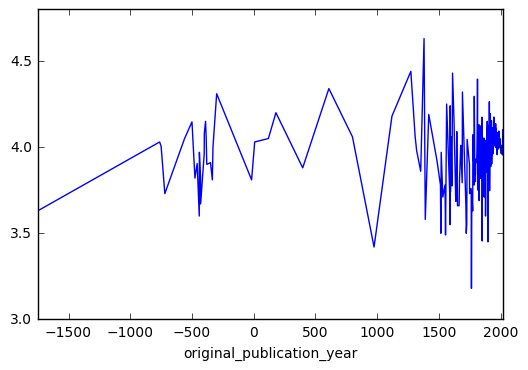

In [30]:
average_rating_over_time = year_groups.average_rating.mean()
average_rating_over_time.plot()

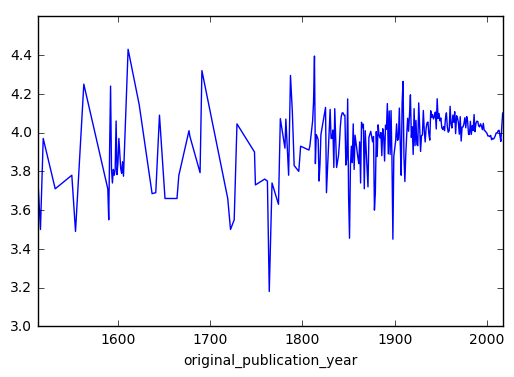

In [55]:
average_rating_over_time_1500 = average_rating_over_time.where(average_rating_over_time.keys() > 1500).dropna()
average_rating_over_time_1500.plot()

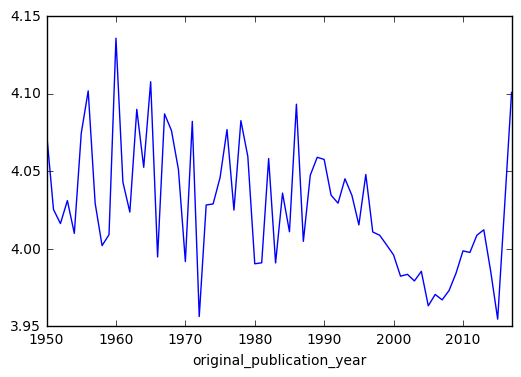

In [56]:
average_rating_over_time_1950 = average_rating_over_time.where(average_rating_over_time.keys() >= 1950).dropna()
average_rating_over_time_1950.plot()

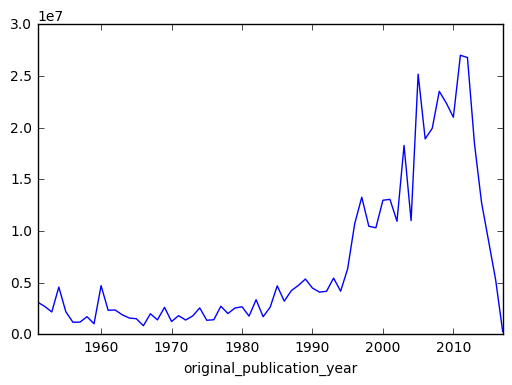

In [59]:
# is volatility due to how many people have actually rated?
# there are probably more ratings in recent times.
reading_over_time = year_groups.ratings_count.sum()
reading_over_time_1950 = reading_over_time.where(reading_over_time.keys() > 1950).dropna()
reading_over_time_1950.plot()

In [62]:
tags.shape, tag_counts.shape

((34252, 2), (999912, 3))

In [104]:
# what are the most popular tags? 
tag_data = pd.merge(tags, tag_counts, on='tag_id').groupby('tag_id').sum()
tag_data.drop(['goodreads_book_id'], axis=1, inplace=True)
tag_data = pd.merge(tag_data, tags, left_index=True, right_on='tag_id')
sorted_tag_data = tag_data.sort_values(['count'], ascending=False)

# people are aspirational by 2 orders of magnitude more than they are productive
sorted_tag_data.head(10)

,count,tag_id,tag_name
30574,140718761,30574,to-read
8717,7507958,8717,currently-reading
11557,4503173,11557,favorites
11743,3688819,11743,fiction
11305,3548157,11305,fantasy
33114,1848306,33114,young-adult
7457,1756920,7457,classics
5207,1317235,5207,books-i-own
26138,1231926,26138,romance
22743,1224279,22743,owned


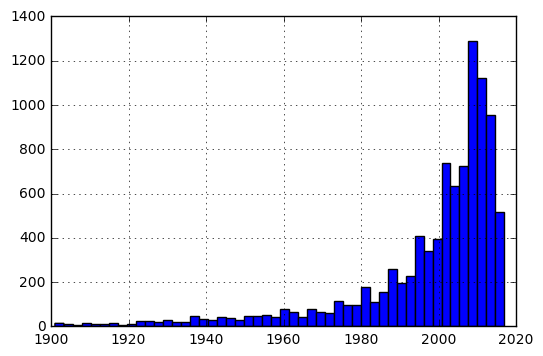

In [127]:
# published books over time (after 1900)
books[books.original_publication_year > 1900].original_publication_year.hist(bins=50)

In [164]:
# average rating of each of the top categories?
tag_names = tag_counts.copy()
tag_names['book_id'] = tag_names.goodreads_book_id
tag_names = pd.merge(tag_names, tags, on='tag_id')
tag_names.drop(['goodreads_book_id', 'tag_id'], axis=1, inplace=True)
tag_names.head()

,count,book_id,tag_name
0,167697,1,to-read
1,24549,2,to-read
2,496107,3,to-read
3,11909,5,to-read
4,298,6,to-read


In [182]:
ratings = pd.DataFrame(columns=['book_id', 'average_rating'])
ratings.book_id = books.book_id
ratings.average_rating = books.average_rating

# count is the tag count
tags_with_ratings = pd.merge(tag_names, ratings, on='book_id')
tags_with_ratings.drop(['count', 'book_id'], axis=1, inplace=True)

## Most popular tag based on number of books, not number of tags
popular_tags_based_on_books = tags_with_ratings.groupby('tag_name').count().sort_values(['average_rating'], ascending=False)
popular_tags_based_on_books

,average_rating
tag_name,
to-read,9983
favorites,9881
owned,9858
books-i-own,9799
currently-reading,9776
library,9415
owned-books,9221
fiction,9097
to-buy,8692


In [192]:
# average rating of most popular categories?
top_500_categories = popular_tags_based_on_books.head(500).index
top_500_categories

Index(['to-read', 'favorites', 'owned', 'books-i-own', 'currently-reading',
       'library', 'owned-books', 'fiction', 'to-buy', 'kindle',
       ...
       'nonfic', 'autobiography-memoir', 'space', 'award-winners',
       'partially-read', '1001-to-read', 'werewolves', 'read-as-a-child',
       'faith', 'guilty-pleasure'],
      dtype='object', name='tag_name', length=500)

In [201]:
top_500_tags_ratings = tags_with_ratings[tags_with_ratings.tag_name.isin(top_500_categories)]
sorted_top_rated_tags = top_500_tags_ratings.groupby(['tag_name']).mean().sort_values(['average_rating'], ascending=False)

In [202]:
sorted_top_rated_tags.head(10)

,average_rating
tag_name,
5-star,4.269784
comics-manga,4.245169
picture-books,4.221658
comic-books,4.220400
comics-graphic-novels,4.218390
comics-and-graphic-novels,4.217915
graphic-novels-and-comics,4.217685
comic,4.214871
graphic-novels-comics,4.214269


In [203]:
sorted_top_rated_tags.tail(10)

,average_rating
tag_name,
chic-lit,3.807898
chicklit,3.794334
read-in-2008,3.789487
stopped-reading,3.789331
gave-up-on,3.781078
womens-fiction,3.776495
women-s-fiction,3.769772
couldn-t-finish,3.750403
gave-up,3.730121


In [247]:
user_ratings = pd.read_csv('ratings.csv')
user_ratings_and_books = pd.merge(user_ratings, books, on='book_id')
user_network_data = pd.DataFrame(columns=['book', 'user_id', 'rating'])
user_network_data.book = user_ratings_and_books.original_title
user_network_data.user_id = user_ratings_and_books.user_id
user_network_data.rating = user_ratings_and_books.rating

In [248]:
# this sample isn't the most accurate representation of what's on the goodreads website
# for ex: still life has 4.04 from 60k ratings but a 4.78 on here with 100 ratings
sorted_books = user_network_data.groupby('book').mean().sort_values(['rating'], ascending=False)
sorted_books.head()

,user_id,rating
book,,
Still Life with Woodpecker,16439.313131,4.777778
The Beautiful and Damned,27160.370000,4.660000
Villa Incognito,29339.969072,4.618557
Peter and the Shadow Thieves,30165.500000,4.557143
The Taste of Home Cookbook,25043.130000,4.550000


In [249]:
sorted_books.tail()

,user_id,rating
book,,
The Woman in White,22867.17,2.88
The Chamber,16083.36,2.88
The Pearls of Lutra,22194.70,2.80
The Fellowship of the Ring,30932.33,2.77
Nine Stories,16445.05,2.53


In [250]:
def check(book):
    return user_network_data[user_network_data.book == book].rating.mean()

In [251]:
check("A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments")

3.3

In [253]:
check("Harry Potter and the Half-Blood Prince")

4.24

In [254]:
user_network_data.shape

(79701, 3)

In [255]:
user_network_data.head()

,book,user_id,rating
0,Harry Potter and the Half-Blood Prince,314,5
1,Harry Potter and the Half-Blood Prince,439,3
2,Harry Potter and the Half-Blood Prince,588,5
3,Harry Potter and the Half-Blood Prince,1169,4
4,Harry Potter and the Half-Blood Prince,1185,4


In [256]:
user_network_data.to_json('user_network_data.json')